In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sarathi.....csv to sarathi.....csv


In [ ]:
import pandas as pd
import pandas as pd
import pandas as pd
import pandas as pd

# Load dataset (update filename if needed)
df = pd.read_csv('sarathi.....csv')

# Show first few rows
df.head()
df.head()
df.head()
df.head()

,Annotator A ID,Annotator B ID,Parition ID,Corpora ID,Sentence ID,Text,Annotator A Text,Annotator B Text,Length,Error,Alignment Score,Agreement
0,1,7.0,2.0,2.0,7506.0,what is the price for round trip between toron...,what is the price for round trip between toron...,what is the price for round trip between toron...,61.0,0.0,1.000000,1.0
1,1,7.0,2.0,2.0,7507.0,trying to find a good deal and good timing to ...,trying to find a good deal and good timing to ...,[trying to find a ]good deal and good timing t...,81.0,17.0,0.790123,0.0
2,1,7.0,2.0,2.0,7509.0,trying to plan route penn ny to montgomery ny....,trying to plan route penn ny to montgomery ny....,trying to plan route penn ny to montgomery ny....,63.0,16.0,0.746032,0.0
3,1,7.0,2.0,2.0,7510.0,"Hi does the 54 Vermonter train go from Newark,...",[Hi ]does the 54 Vermonter train go from Newar...,[Hi ]does the 54 Vermonter train go from Newar...,87.0,10.0,0.885057,1.0
4,1,7.0,2.0,2.0,7511.0,is there a train service from los angeles ca t...,is there a train service from los angeles ca t...,is there a train service from los angeles ca t...,64.0,0.0,1.000000,1.0


In [ ]:
# Shape and structure
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe()

Shape: (2663, 12)
Columns: ['Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID', 'Sentence ID', 'Text', 'Annotator A Text', 'Annotator B Text', 'Length', 'Error', 'Alignment Score', 'Agreement']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Annotator A ID    2662 non-null   object 
 1   Annotator B ID    2662 non-null   float64
 2   Parition ID       2658 non-null   float64
 3   Corpora ID        2658 non-null   float64
 4   Sentence ID       2658 non-null   float64
 5   Text              2658 non-null   object 
 6   Annotator A Text  2658 non-null   object 
 7   Annotator B Text  2658 non-null   object 
 8   Length            2658 non-null   float64
 9   Error             2658 non-null   float64
 10  Alignment Score   2658 non-null   float64
 11  Agreement         2658 non-null   float64
dtypes: float64(8), object(4

,Annotator B ID,Parition ID,Corpora ID,Sentence ID,Length,Error,Alignment Score,Agreement
count,2662.000000,2658.0,2658.0,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,5.029943,2.0,2.0,8009.269752,97.922122,9.459744,0.923570,0.787434
std,2.435083,0.0,0.0,286.698423,39.827029,20.537986,0.149602,0.409200
min,0.076430,2.0,2.0,7506.000000,43.000000,0.000000,0.000000,0.000000
25%,3.000000,2.0,2.0,7758.000000,68.000000,0.000000,0.905325,1.000000
50%,5.000000,2.0,2.0,8012.500000,84.500000,0.000000,1.000000,1.000000
75%,7.000000,2.0,2.0,8255.000000,117.000000,9.750000,1.000000,1.000000
max,97.922122,2.0,2.0,8505.000000,200.000000,198.000000,1.000000,1.000000


In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

Missing Values:
 Annotator A ID      1
Annotator B ID      1
Parition ID         5
Corpora ID          5
Sentence ID         5
Text                5
Annotator A Text    5
Annotator B Text    5
Length              5
Error               5
Alignment Score     5
Agreement           5
dtype: int64
Duplicate Rows: 0


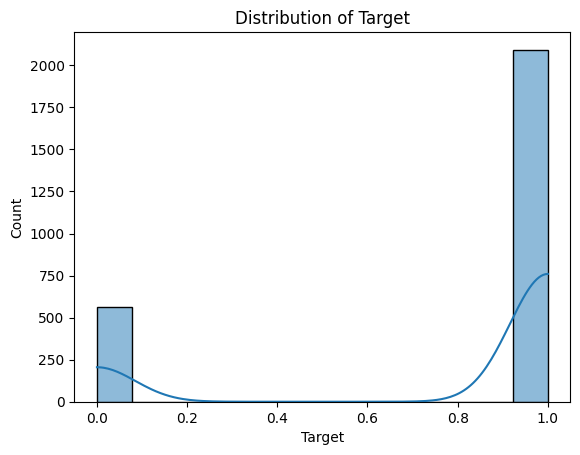

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'target_column' with the actual name of your target column
target_column = df.columns[-1]

sns.histplot(df[target_column], kde=True)
plt.title("Distribution of Target")
plt.xlabel("Target")
plt.show()

In [ ]:
target = df.columns[-1]
features = df.columns.drop(target)
print("Features:", features)

Features: Index(['Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID',
       'Sentence ID', 'Text', 'Annotator A Text', 'Annotator B Text', 'Length',
       'Error', 'Alignment Score'],
      dtype='object')


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

df_encoded = pd.get_dummies(df, drop_first=True)


Categorical Columns: ['Annotator A ID', 'Text', 'Annotator A Text', 'Annotator B Text']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(target, axis=1))
y = df_encoded[target]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer


target_column = df.columns[-1]


imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


X = df_imputed.drop(target_column, axis=1)
y = df_imputed[target_column]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.10665644669089891
R² Score: 0.34817086308129597


In [ ]:

new_sample = df.drop(target, axis=1).iloc[0]
new_df = pd.DataFrame([new_sample])


df_temp = pd.concat([df.drop(target, axis=1), new_df], ignore_index=True)
df_temp_encoded = pd.get_dummies(df_temp, drop_first=True)
df_temp_encoded = df_temp_encoded.reindex(columns=df_encoded.drop(target, axis=1).columns, fill_value=0)


new_input_scaled = scaler.transform(df_temp_encoded.tail(1))
predicted_value = model.predict(new_input_scaled)

print("🎯 Predicted Value:", round(predicted_value[0], 2))


🎯 Predicted Value: 1.0


In [ ]:
!pip install gradio

import gradio as gr

def predict_from_input(**kwargs):
    input_df = pd.DataFrame([kwargs])
    df_temp = pd.concat([df.drop(target, axis=1), input_df], ignore_index=True)
    df_temp_encoded = pd.get_dummies(df_temp, drop_first=True)
    df_temp_encoded = df_temp_encoded.reindex(columns=df_encoded.drop(target, axis=1).columns, fill_value=0)
    scaled_input = scaler.transform(df_temp_encoded.tail(1))
    prediction = model.predict(scaled_input)
    return round(prediction[0], 2)

# Auto-generate Gradio inputs
inputs = []
for col in df.drop(columns=target).columns:
    if df[col].dtype == 'object':
        inputs.append(gr.Dropdown(choices=df[col].dropna().unique().tolist(), label=col))
    else:
        inputs.append(gr.Number(label=col))

output = gr.Number(label=f"🎯 Predicted {target}")

gr.Interface(fn=predict_from_input, inputs=inputs, outputs=output, title="📈 Sarathi Prediction App").launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1023: UserWarning: Expected 0 arguments for function <function predict_from_input at 0x7923e5c26ca0>, received 11.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1031: UserWarning: Expected maximum 0 arguments for function <function predict_from_input at 0x7923e5c26ca0>, received 11.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a1ad1da7409dbb9abf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
